# Pendulo Invertido


### El proyecto asignado es el cálculo de un sistema de péndulo invertido (ver figura), tal que su movimiento está limitado por un resorte (el origen del eje se desplaza de manera oscilatoria)

### La primera parte es calcular el Hamiltoniano y Lagrangiano.

### Asimismo, debes calcular en python las siguientes gráficas (antes  debes explicar y en qué consiste estas 4 gráficas) con especial énfasis en lo que pueden aportar dichas gráficas en el problema. 

### Las gráficas que se van a calcular son las siguientes:
#### (a) Puntos de Lagrange
#### (b) Diagrama de Poincaré
#### (c) deterinar las Orbitas
#### (d) Grafica de velocidad cero

<p align="center"> <img src="./pendu1.jpg" alt="Mi imagen local"> 



## Solución del problema

Para resolver el problema con la mecánica lagrangiana, vamos a tomar en cuenta el siguiente esquema

<p align="center"> <img src="./esqumaproyecto.png" alt="Esquema del sistema"> 

Debemos recordar que,

$$
L = T -V
$$

Para hallar el lagrangiano de este sistema, primero debemos calcular la posición de la partícula de interés (el péndulo) y así obtener sus velocidades.

$$
\vec{r} = (l\sin\theta + B) \hat{i} + l \cos\theta \hat{j}
$$

por lo tanto sus velocidades son,

$$
\vec{V}= l \dot{\theta}\cos\theta \hat{i} -l \dot{\theta}\sin\theta \hat{j}
$$

Con esta información podemos representar la energía cinética, esta es \( T= \frac{1}{2} m V^2 \), entonces: 

$$
T = \frac{1}{2} m l^2 \dot{\theta}^2
$$

Para la energía potencial, tendremos en cuenta la energía potencial del resorte y la energía potencial gravitacional.

$$
V = V_r + V_g = \frac{1}{2} k X^2 + mgY = \frac{1}{2} k (r \sin\theta + B)^2 + mgl\cos\theta
$$

Finalmente podemos obtener el lagrangiano, teniendo en cuenta la ecuación \( \label{lagra} \).

$$
L = \frac{1}{2} m l^2 \dot{\theta}^2 -  \frac{1}{2} k (r \sin\theta + B)^2 - mgl\cos\theta
$$






## Ecuaciones de Movimiento

Con el lagrangiano calculado en la ecuación \ref{lagrown}, podemos hacer uso de la ecuación de Euler-Lagrange \ref{eula} y así obtener las ecuaciones de movimiento.

$$
\frac{d}{dt} \left( \frac{\partial L }{\partial \dot{q}_i} \right) - \frac{\partial L }{\partial q_i} = \sum Q_i
$$

Entonces nuestra ecuación de movimiento es:

$$
\ddot{\theta} = \frac{Q_0}{m l^2} \cos \Omega t + \left( \frac{g}{l} - \frac{K h^2}{m l^2} \cos\theta \right) \sin\theta - \frac{KBh}{m l^2} \cos\theta
$$

## Hamiltoniano
Para hallar el hamiltoniano, usaremos las transformaciones de Legendre.

$$
H = \dot{q}_i P - L
$$

donde

$$
P = \frac{\partial L}{\partial \dot{q}_i}
$$

Entonces, el hamiltoniano de nuestro sistema es:

$$
H = \frac{P^2}{2ml^2} + mgl \cos\theta + \frac{1}{2} k \left( h \sin\theta + B \right)^2
$$

Además,

$$
\dot{P} = - \frac{\partial H}{\partial \theta} = mgl \sin\theta -kh\left( h \sin\theta + B \right)\cos\theta
$$

$$
P= \frac{\partial H}{\partial P} = \frac{P}{ml^2}
$$


# Vamos a resolver las ecuaciones de movimiento con python

In [36]:
#Importamos lo que necesitamos
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation
from scipy.optimize import fsolve

In [37]:
# Parámetros del sistema
m = 1   # Masa del péndulo
l = 1.0  # Longitud del péndulo
k = 1  # Constante del resorte
h = 0.7*l  # Longitud natural del resorte cuando no está comprimido o extendido
Q0 = 1.0  # Amplitud de la fuerza externa
Omega = 1.0  # Frecuencia de la fuerza externa
g = 9.81  # Aceleración debida a la gravedad
B = 0   # Distancia la base del pendulo al origen

In [38]:
# Definir las ecuaciones del movimiento
def equations(z, t):
    theta, dthetadt = z
    d2thetadt2 =  (Q0/m*l**2)*np.cos(Omega*t) + (g/l - ((k*h**2)/(m*l**2))*np.cos(theta))*np.sin(theta) - ((B*k*h)/(m*l**2))*np.cos(theta)
    return [dthetadt, d2thetadt2]

In [39]:
# Condiciones iniciales
theta0 = np.pi / 3  # ángulo inicial (en radianes)
dthetadt0 = 0.0     # velocidad angular inicial
z0 = [theta0, dthetadt0]

In [40]:
# Intervalo de tiempo
t = np.linspace(0, 10, 1000)

# Resolver el sistema de ecuaciones diferenciales
sol = odeint(equations, z0, t)

# Extraer las soluciones
theta_sol = sol[:, 0]
dthetadt_sol = sol[:, 1]

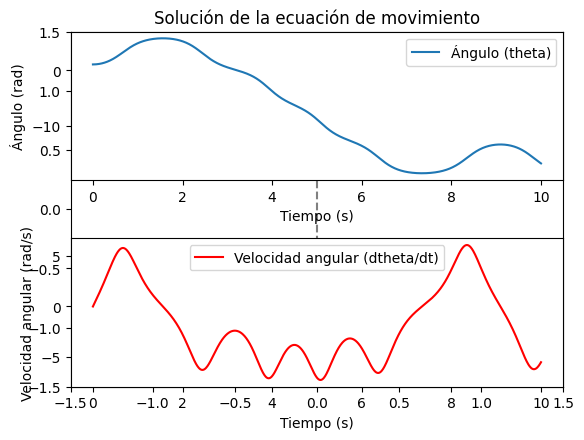

In [41]:
# Convertir las posiciones angulares a coordenadas x, y del péndulo
pendulum_x = l * np.cos(theta_sol)
pendulum_y = l * np.sin(theta_sol)

# Coordenadas del resorte
spring_x = h * np.cos(theta_sol) 
spring_y = h * np.sin(theta_sol)

# Crear la figura y el eje para la animación
fig, ax = plt.subplots()
ax.set_xlim(-l - 0.5, l + 0.5)
ax.set_ylim(-l - 0.5, l + 0.5)
ax.axvline(-B, color='gray', linestyle='--')
line_pendulum, = ax.plot([], [], 'o-', lw=2, color='blue')
line_spring, = ax.plot([], [], color='red', linestyle='-', lw=1)

# Función de inicialización
def init():
    line_pendulum.set_data([], [])
    line_spring.set_data([], [])
    return line_pendulum, line_spring

# Función de animación
def update(frame):
    # Actualizar datos del péndulo
    line_pendulum.set_data([0, pendulum_x[frame]], [0, pendulum_y[frame]])
    
    # Actualizar datos del resorte
    line_spring.set_data([-B, spring_x[frame]], [h, spring_y[frame]])
    
    return line_pendulum, line_spring

# Crear la animación
ani = FuncAnimation(fig, update, frames=range(len(t)), init_func=init, blit=True)

# Mostrar la animación
#plt.show()

# Graficar los resultados
#plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(t, theta_sol, label='Ángulo (theta)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Solución de la ecuación de movimiento')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, dthetadt_sol, label='Velocidad angular (dtheta/dt)', color='r')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad angular (rad/s)')
plt.legend()

plt.tight_layout()
plt.show()

# Puntos de Legendre

In [42]:
# Definir la función de equilibrio
def equilibrium(theta):
    return ((Q0/m*l**2)*np.cos(Omega*0) + (g/l - ((k*h**2)/(m*l**2))*np.cos(theta))*np.sin(theta) - ((B*k*h)/(m*l**2))*np.cos(theta))

# Encontrar los puntos de equilibrio usando fsolve
theta_initial_guesses = np.linspace(0, np.pi / 2, 100)
equilibrium_points = fsolve(equilibrium, theta_initial_guesses)

# Filtrar valores duplicados y mantener solo los puntos de equilibrio únicos
unique_equilibrium_points = np.unique(np.round(equilibrium_points, decimals=5))

# Mostrar los puntos de equilibrio
print("Puntos de equilibrio (Lagrange):", unique_equilibrium_points)

Puntos de equilibrio (Lagrange): [-18.95703 -12.67384  -9.32752  -6.39066  -3.04433  -0.10747   3.23886]


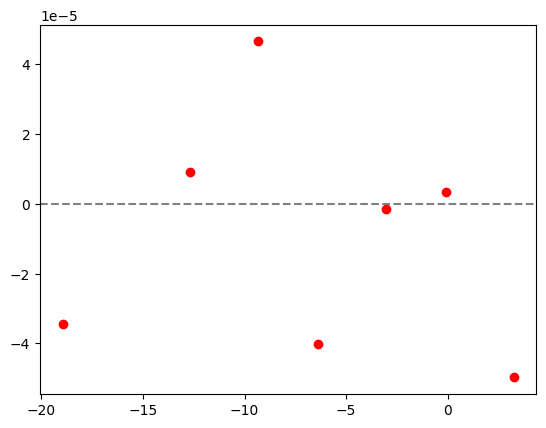

In [43]:
# Graficar la función de equilibrio
theta_vals = np.linspace(0, np.pi, 400)
equilibrium_vals = equilibrium(theta_vals)

#plt.plot(theta_vals, equilibrium_vals, label='Función de equilibrio')
plt.axhline(0, color='gray', linestyle='--')
plt.scatter(unique_equilibrium_points, equilibrium(unique_equilibrium_points), color='red', zorder=5)


In [44]:
# range of x and y grid
xmax = np.pi*6.5
ymax = 6
fac=1.01
# hacer una cuadrícula de valores x e y, Y =  X punto
X,Y = np.meshgrid(np.arange(-xmax,xmax,.1),np.arange(-ymax,ymax,.1) )
epsilon=0.4
H = 0.5*Y*Y/(m*l**2)  + m*g*l*np.cos(X) + 0.5*k*(np.sin(X)*h +B )*(np.sin(X)*h +B) #Este es el hamiltoniano
# Las ecuaciones de Hamilton nos dan un campo vectorial U,V
U = Y/(m*l**2 ) # dH/dp
V = m*g*l*np.sin(X) - k*h*(h*np.sin(X) + B)*np.cos(X)  # dH/dtheta

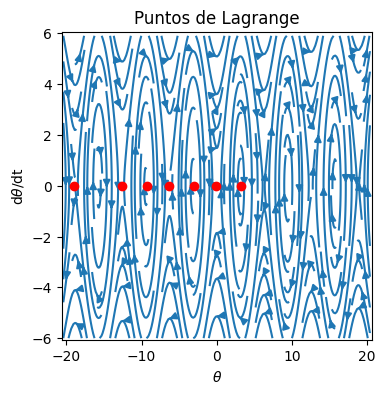

In [45]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.set_title('Puntos de Lagrange')
ax.set_xlabel(r'$ \theta$')
ax.set_ylabel(r'd$\theta$/dt')
ax.set_xlim([-xmax*fac, xmax*fac])
ax.set_ylim([-ymax*fac, ymax*fac])
#plt.plot(theta_vals, equilibrium_vals, label='Función de equilibrio')
#plt.axhline(0, color='gray', linestyle='--')
ax.scatter(unique_equilibrium_points, equilibrium(unique_equilibrium_points), color='red', zorder=5)

# guardar la imagen .jpg
plt.savefig('lagrange.jpg')

# plot the vector field here with either of the two commands below
#Q = plt.quiver(X,Y,U, V)
Q = ax.streamplot(X,Y,U, V,density=2)
plt.show()

Si acercamos a los puntos de interes, tenemos 

<p align="center"> <img src="./puntoslagrange.png" alt="Esquema del sistema"> 

# Diagrama de Poncarie

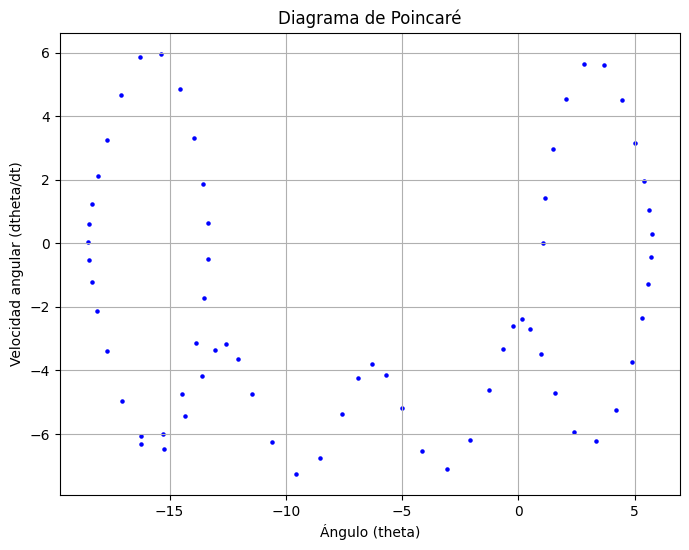

In [46]:
# Generar el diagrama de Poincaré
poincare_theta = []
poincare_dtheta = []
interval = int(len(t) / (20 * np.pi / Omega))  # Intervalo de muestreo basado en el período de la fuerza externa

for i in range(0, len(t), interval):
    poincare_theta.append(theta_sol[i])
    poincare_dtheta.append(dthetadt_sol[i])

# Graficar el diagrama de Poincaré
plt.figure(figsize=(8, 6))
plt.scatter(poincare_theta, poincare_dtheta, s=5, color='blue')
plt.xlabel('Ángulo (theta)')
plt.ylabel('Velocidad angular (dtheta/dt)')
plt.title('Diagrama de Poincaré')
plt.grid(True)
plt.show()

# Determinacion de Orbitas

In [47]:
# Condiciones iniciales
initial_conditions = [
    [np.pi / 4, 0.0],  # Caso 1: Ángulo inicial de π/4 radianes, velocidad angular inicial 0
    [np.pi / 6, 0.0],  # Caso 2: Ángulo inicial de π/6 radianes, velocidad angular inicial 0
    [np.pi / 3, 0.0],  # Caso 3: Ángulo inicial de π/3 radianes, velocidad angular inicial 0
    [np.pi / 2, 0.0]   # Caso 4: Ángulo inicial de π/2 radianes, velocidad angular inicial 0
]

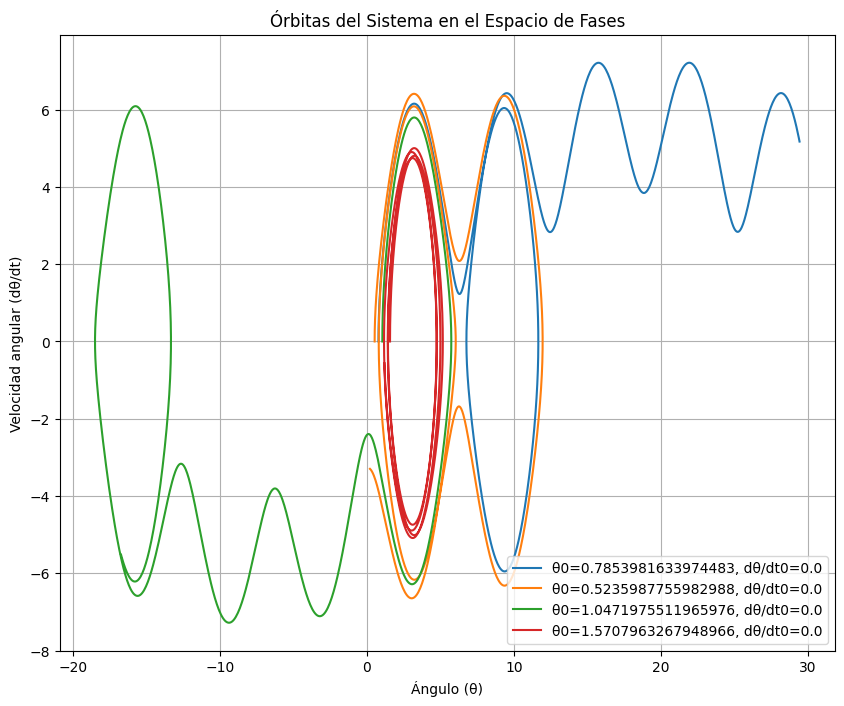

In [48]:
# Graficar las órbitas
plt.figure(figsize=(10, 8))

for z0 in initial_conditions:
    # Resolver el sistema de ecuaciones diferenciales
    sol = odeint(equations, z0, t)
    
    # Extraer las soluciones
    theta_sol = sol[:, 0]
    dthetadt_sol = sol[:, 1]
    
    # Graficar el espacio de fases (θ, dθ/dt)
    plt.plot(theta_sol, dthetadt_sol, label=f'θ0={z0[0]}, dθ/dt0={z0[1]}')

plt.xlabel('Ángulo (θ)')
plt.ylabel('Velocidad angular (dθ/dt)')
plt.title('Órbitas del Sistema en el Espacio de Fases')
plt.legend()
plt.grid(True)
plt.show()

# Grafica de velocidad Cero

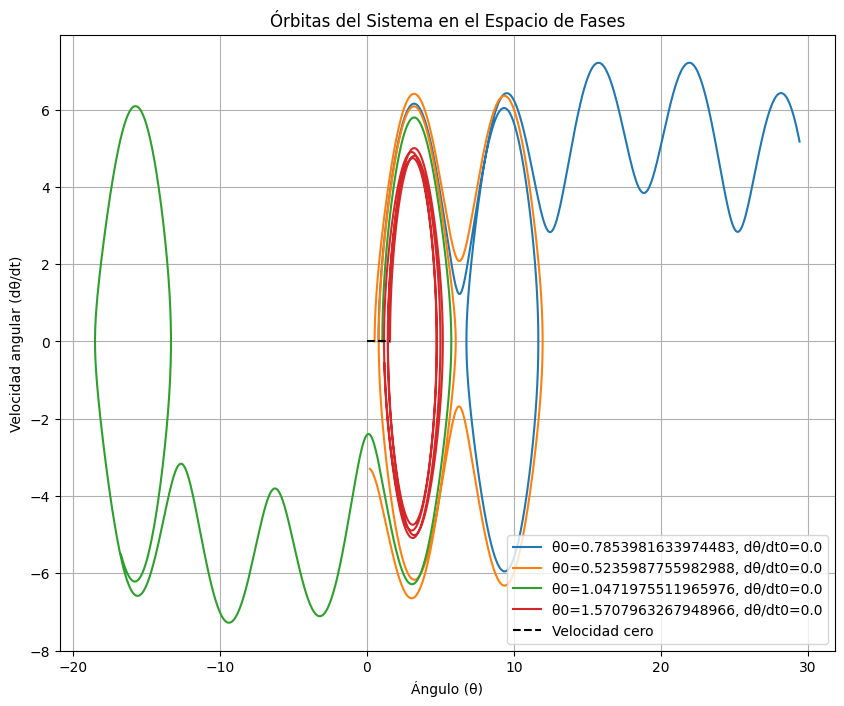

In [49]:
# Graficar las órbitas
plt.figure(figsize=(10, 8))

for z0 in initial_conditions:
    # Resolver el sistema de ecuaciones diferenciales
    sol = odeint(equations, z0, t)
    
    # Extraer las soluciones
    theta_sol = sol[:, 0]
    dthetadt_sol = sol[:, 1]
    
    # Graficar el espacio de fases (θ, dθ/dt)
    plt.plot(theta_sol, dthetadt_sol, label=f'θ0={z0[0]}, dθ/dt0={z0[1]}')

# Graficar la línea de velocidad cero
theta_range = np.linspace(0, np.pi / 2, 500)
zero_velocity = np.zeros_like(theta_range)
plt.plot(theta_range, zero_velocity, 'k--', label='Velocidad cero')

plt.xlabel('Ángulo (θ)')
plt.ylabel('Velocidad angular (dθ/dt)')
plt.title('Órbitas del Sistema en el Espacio de Fases')
plt.legend()
plt.grid(True)
plt.show()


Si acercamos a los puntos de interes, tenemos 

<p align="center"> <img src="./Velocidad_cero.png" alt="Esquema del sistema"> 

# Coeficiente Lyapunov

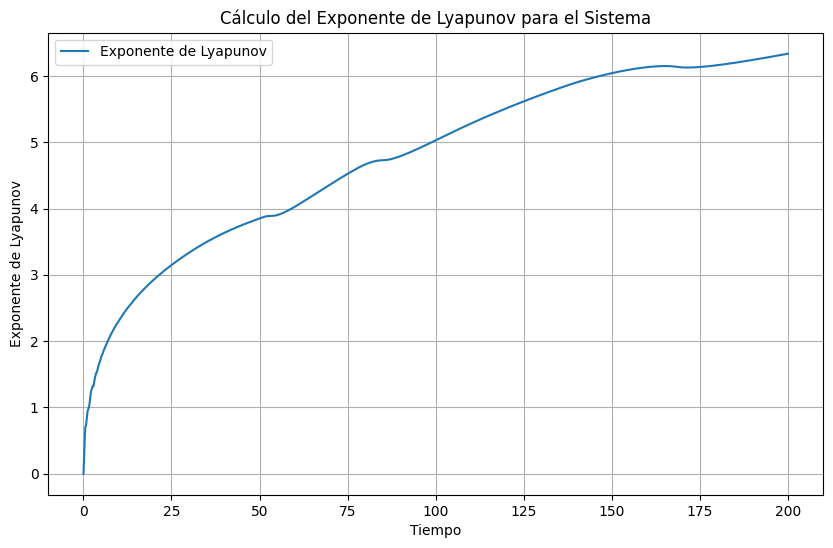

In [50]:
# Parámetros para el cálculo del exponente de Lyapunov
dt = 0.01
Tmax = 200
n_steps = int(Tmax / dt)
epsilon = 1e-8  # Perturbación inicial

# Inicializar las condiciones iniciales y las trayectorias
z0 = [np.pi / 4, 0.0]
z0_perturbed = [np.pi / 4 + epsilon, 0.0]

# Función para integrar y obtener trayectorias
def integrate(z0, dt, n_steps):
    trajectory = np.zeros((n_steps, 2))
    z = z0
    for i in range(n_steps):
        trajectory[i] = z
        z = odeint(equations, z, [0, dt])[1]
    return trajectory

trajectory = integrate(z0, dt, n_steps)
trajectory_perturbed = integrate(z0_perturbed, dt, n_steps)

# Cálculo del exponente de Lyapunov
lyapunov_exp = np.zeros(n_steps)
for i in range(n_steps):
    delta_z = trajectory_perturbed[i] - trajectory[i]
    delta_norm = np.linalg.norm(delta_z)
    if delta_norm == 0:
        delta_norm = epsilon  # Evitar división por cero
    lyapunov_exp[i] = np.log(delta_norm / epsilon)

lyapunov_exp = np.cumsum(lyapunov_exp) / np.arange(1, n_steps + 1)

# Graficar el exponente de Lyapunov
plt.figure(figsize=(10, 6))
plt.plot(np.arange(n_steps) * dt, lyapunov_exp, label='Exponente de Lyapunov')
plt.xlabel('Tiempo')
plt.ylabel('Exponente de Lyapunov')
plt.title('Cálculo del Exponente de Lyapunov para el Sistema')
plt.legend()
plt.grid(True)
plt.show()